# 축구 이적료 분석

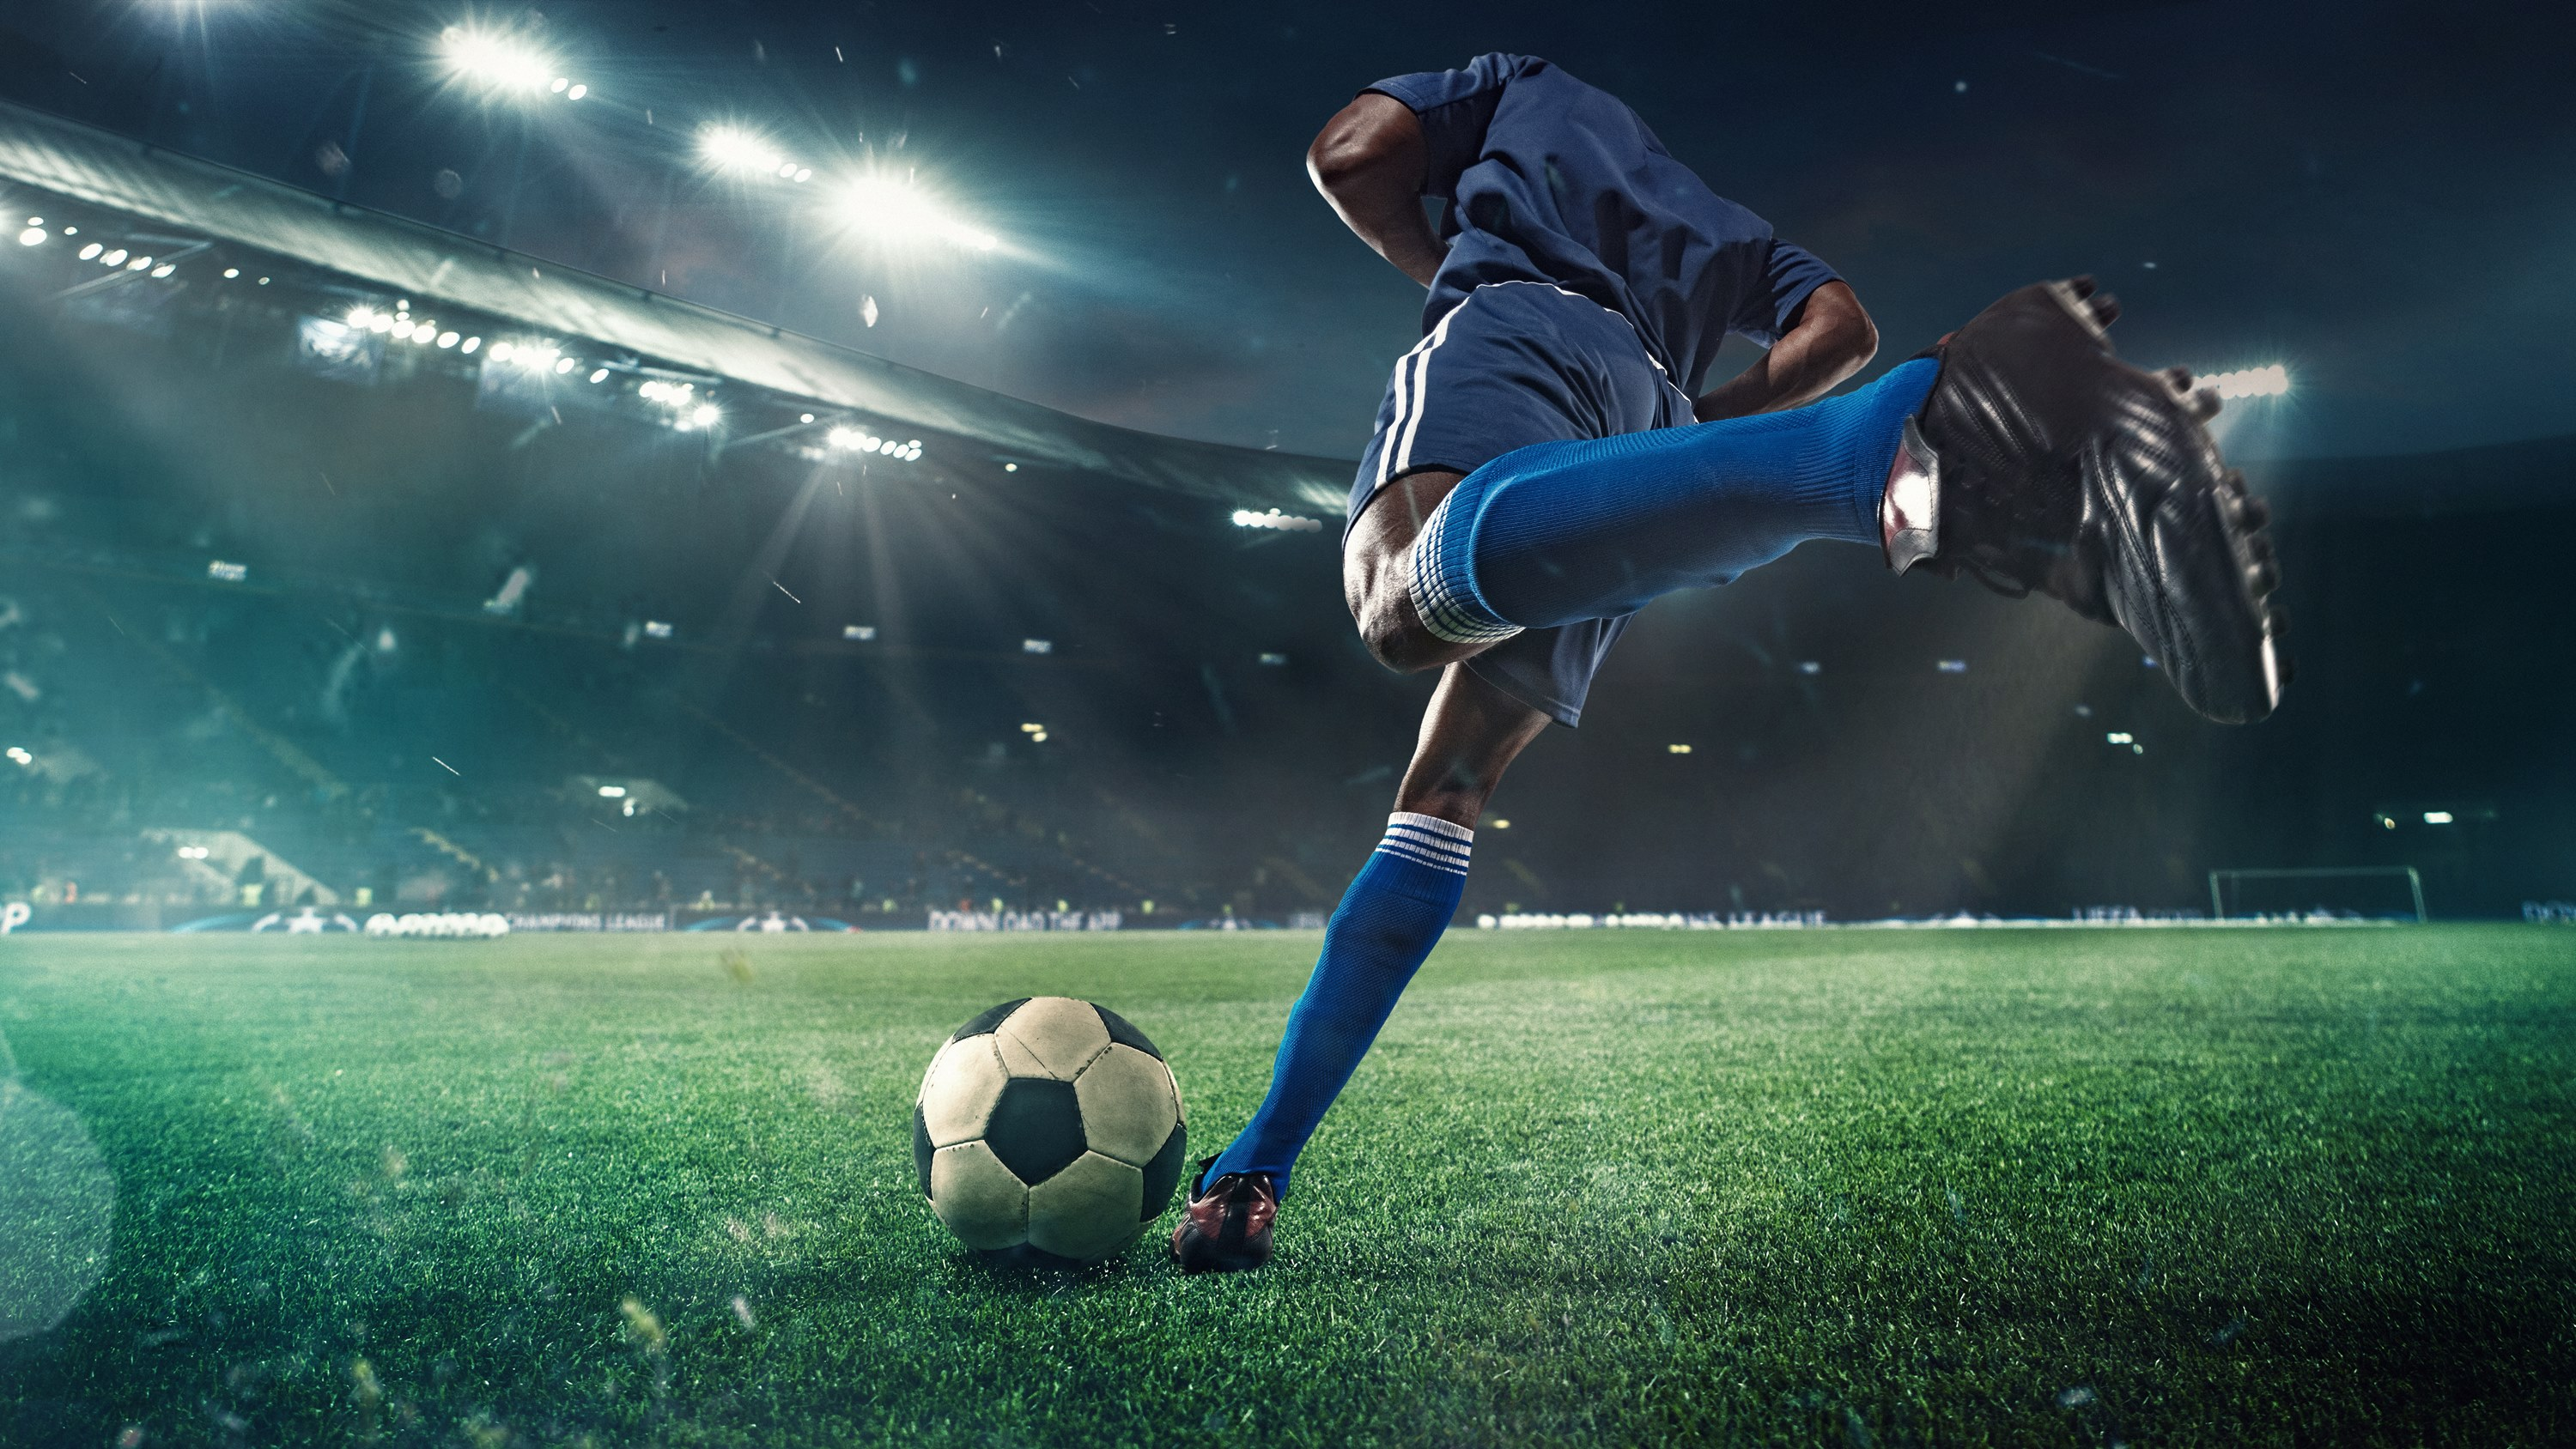

In [27]:
from IPython.display import Image
Image("../picture/___master1305__GettyImages.jpg")

# 사용한 모듈

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 데이터(https://dacon.io/competitions/official/235538/data)
###### 데이터 : 데이콘(https://dacon.io/competitions/official/235538/data)
###### 구성 : FIFA_train.csv / FIFA_test.csv / submission.csv
###### 데이터 설명 :  
###### id : 선수 고유의 아이디
###### name : 이름
###### age : 나이
###### continent : 선수들의 국적이 포함되어 있는 대륙입니다
###### contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
###### position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
###### prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
###### reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
###### stat_overall : 선수의 현재 능력치 입니다.
###### stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
###### stat_skill_moves : 선수의 개인기 능력치 입니다.
###### value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다
###### 모든 데이터가 깔끔하게 처리되어 있어 바로 데이터 탐색에 들어갔습니다.

In [29]:
train_data = pd.read_csv("../data/FIFA_DATA/FIFA_train.csv")

In [4]:
#전반적인 데이터 확인
print(train_data.shape)
print('\n')
print(train_data.info())
print('\n')
print(train_data.describe())

(8932, 12)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB
None


                 id          age   reputation  stat_overall  stat_potential  \
count   8932.000000  8932.000000  8932.000000   8932.000000     8932.000

In [5]:
#탐색과정에서 필요없는 id, name, contract_until 제거
train_data.drop(['id','name', "contract_until"], axis=1, inplace=True)

In [6]:
#변경해야되는 칼럼 확인
train_data.columns
print(train_data.continent.unique())
print(train_data.prefer_foot.unique())    
print(train_data.position.unique())    

['south america' 'europe' 'africa' 'asia' 'oceania']
['left' 'right']
['ST' 'GK' 'DF' 'MF']


In [7]:
#String으로 된 데이터 숫자로 범주화 시도
train_data.replace({'south america' : '0', 'europe' : '1', 'africa' : '2', 'asia' : '3', 'oceania' : '4'}, inplace=True)
train_data.replace({'left' : '0', 'right': '1'}, inplace=True)
train_data.replace({'ST':'0', 'GK':'1', 'DF':'2', 'MF':'3'}, inplace=True)
train_data = train_data.astype({'continent':'float', 'position':'float', 'prefer_foot':'float'})

In [8]:
#데이터 변경점 재확인
print(train_data.shape)
print('\n')
print(train_data.info())
print('\n')
print(train_data.describe())

(8932, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8932 non-null   int64  
 1   continent         8932 non-null   float64
 2   position          8932 non-null   float64
 3   prefer_foot       8932 non-null   float64
 4   reputation        8932 non-null   float64
 5   stat_overall      8932 non-null   int64  
 6   stat_potential    8932 non-null   int64  
 7   stat_skill_moves  8932 non-null   float64
 8   value             8932 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 628.2 KB
None


               age    continent     position  prefer_foot   reputation  \
count  8932.000000  8932.000000  8932.000000  8932.000000  8932.000000   
mean     25.209136     1.099978     1.889163     0.765450     1.130878   
std       4.635515     0.902957     1.117158     0.423741     0.423792   
min      1

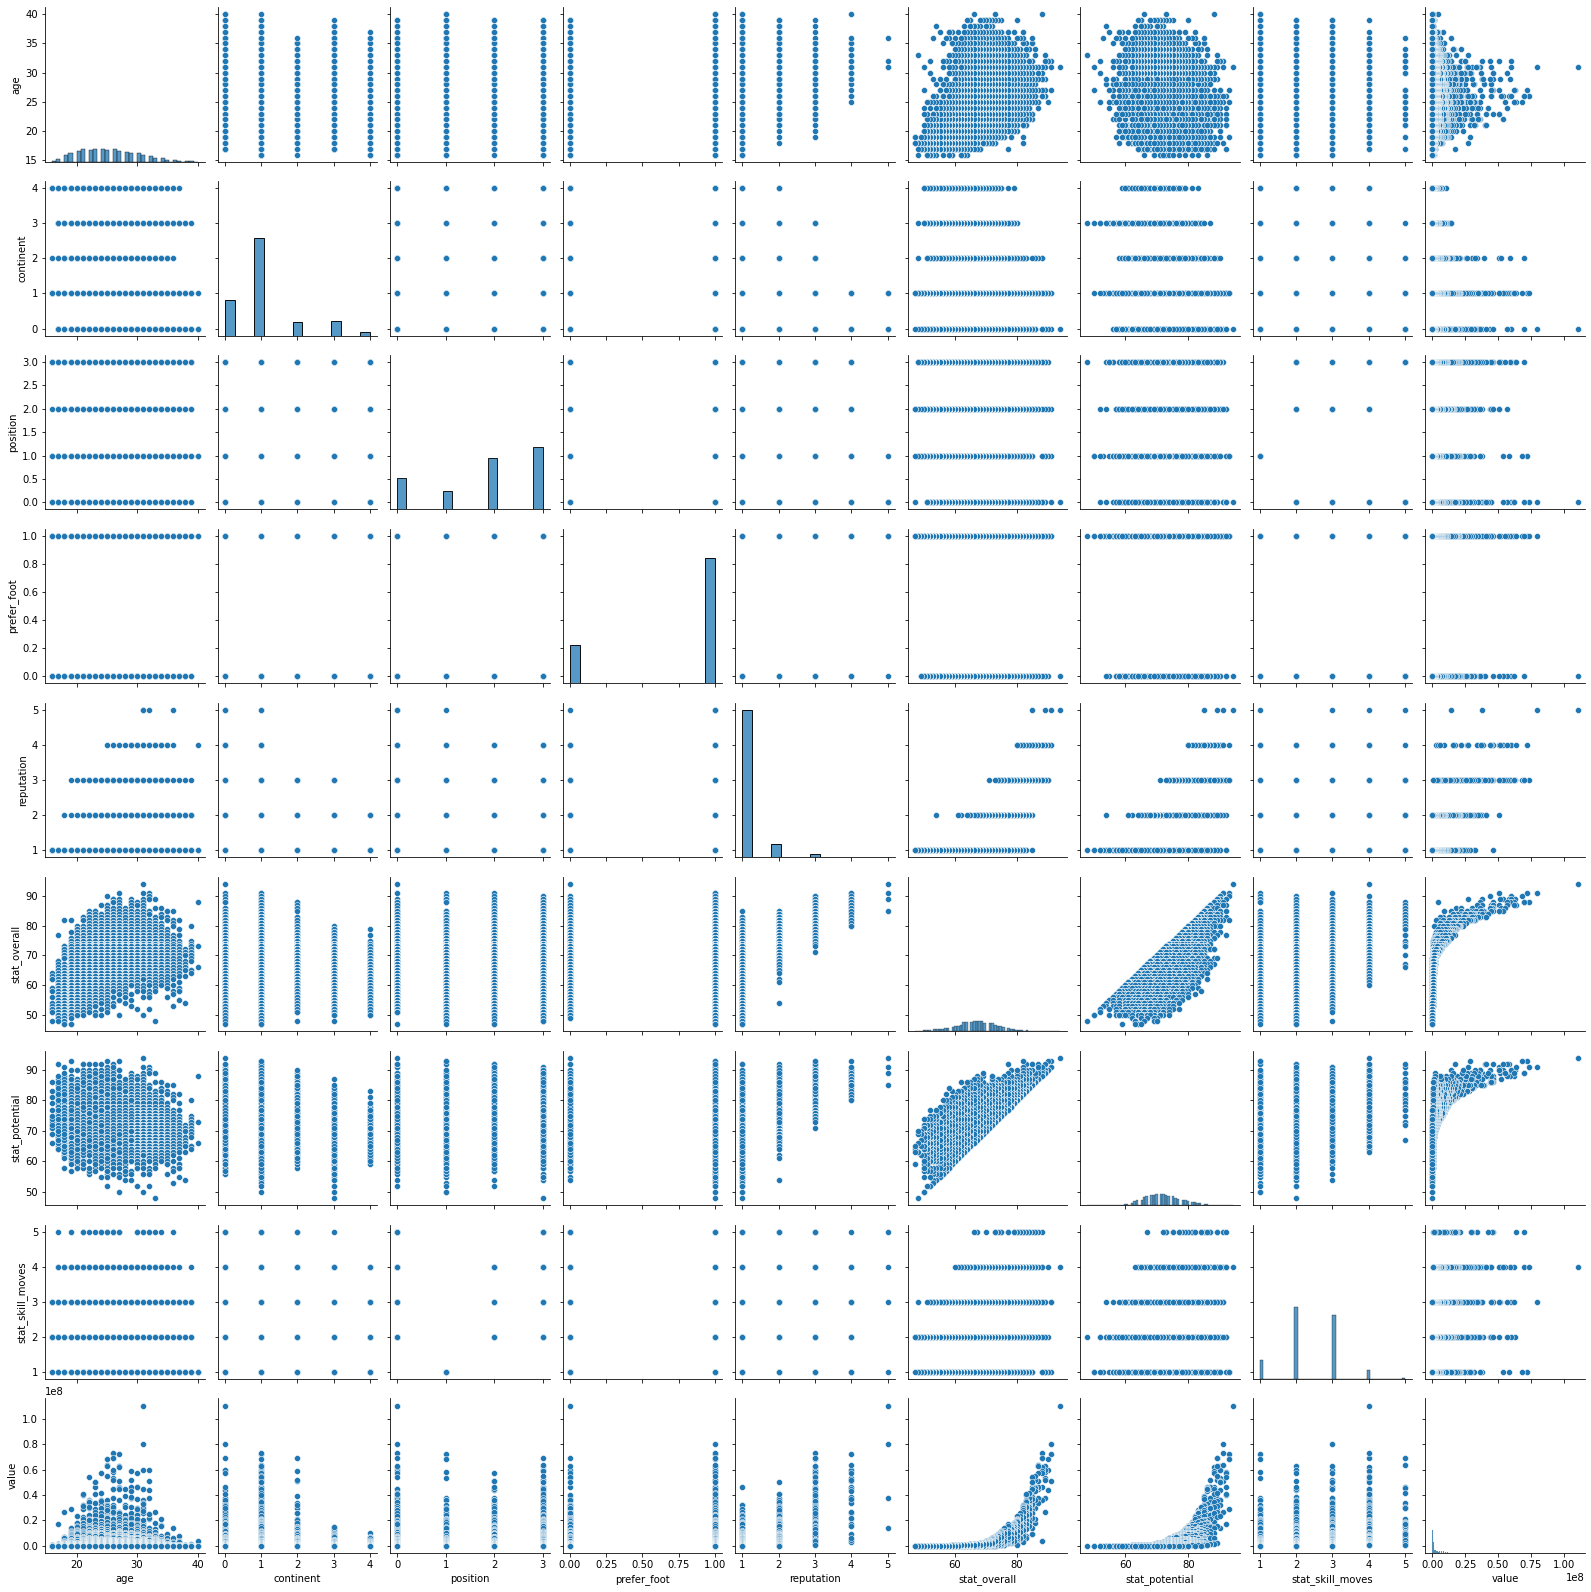

,age,continent,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
age,1.000000,-0.065238,0.001796,0.007760,0.263468,0.467345,-0.231303,0.039362,0.087319
continent,-0.065238,1.000000,0.013761,0.017691,-0.053510,-0.186096,-0.180026,-0.050928,-0.093650
position,0.001796,0.013761,1.000000,-0.059890,-0.010271,0.031746,0.011436,0.173280,0.001506
prefer_foot,0.007760,0.017691,-0.059890,1.000000,0.003859,-0.036585,-0.029030,-0.109107,-0.008204
reputation,0.263468,-0.053510,-0.010271,0.003859,1.000000,0.521389,0.399183,0.196582,0.665982
stat_overall,0.467345,-0.186096,0.031746,-0.036585,0.521389,1.000000,0.665453,0.400164,0.658444
stat_potential,-0.231303,-0.180026,0.011436,-0.029030,0.399183,0.665453,1.000000,0.332578,0.611907
stat_skill_moves,0.039362,-0.050928,0.173280,-0.109107,0.196582,0.400164,0.332578,1.000000,0.298500
value,0.087319,-0.093650,0.001506,-0.008204,0.665982,0.658444,0.611907,0.298500,1.000000


In [9]:
#전반적인 흐름 읽기
check_data = sns.pairplot(train_data)
plt.show()
train_data.corr()

value칸을 보면 reputation, stat_overall, stat_potential, stat_skill_moves 순으로 관계 중요

# 시각화

Text(0.5, 1.0, 'Potential Stat')

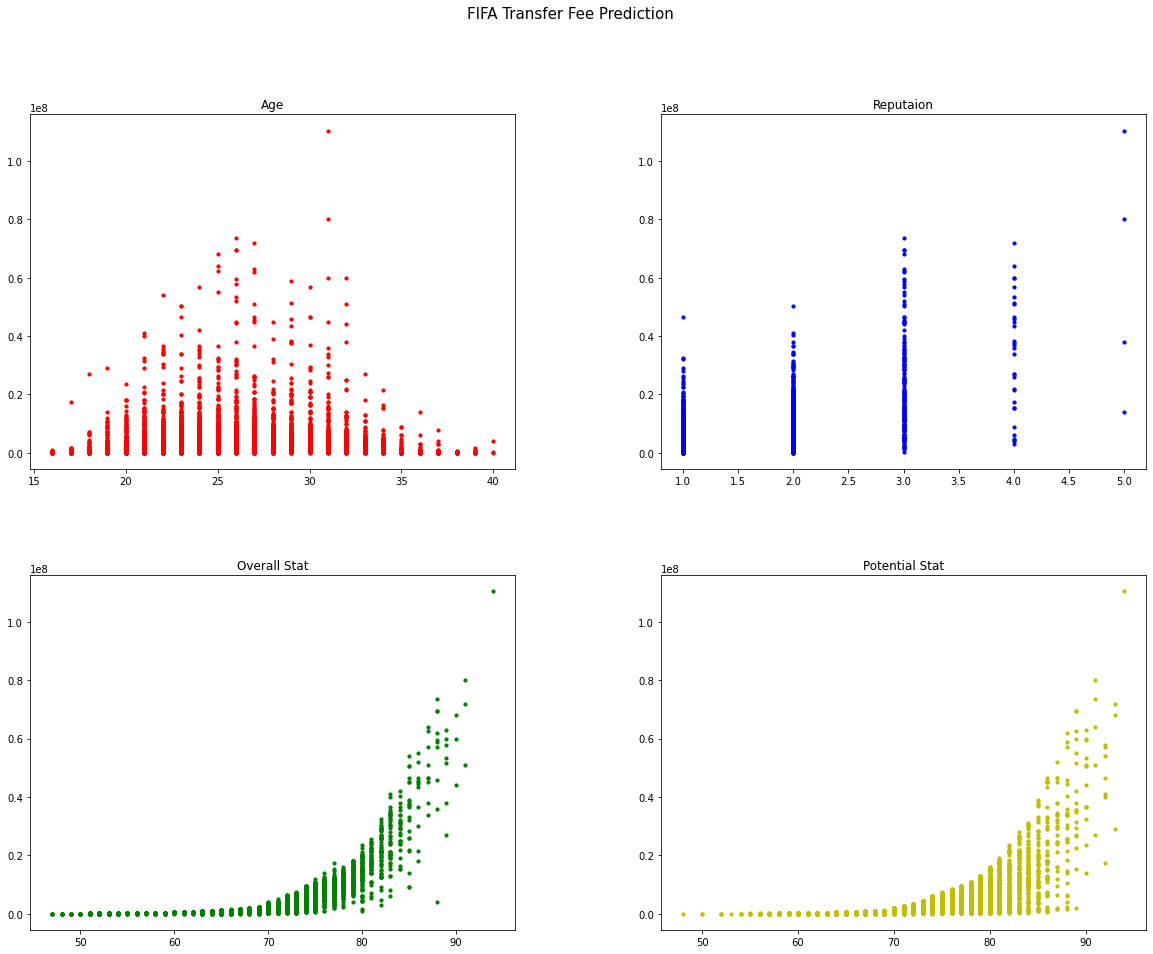

In [11]:

f, axes = plt.subplots(2, 2)
f.set_size_inches((20, 15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

f.suptitle('FIFA Transfer Fee Prediction', fontsize = 15)

axes[0, 0].scatter(train_data['age'], train_data['value'], color = 'red', s = 10)
axes[0, 0].set_title('Age', fontsize = 12)
axes[0, 1].scatter(train_data['reputation'], train_data['value'], color = 'blue', s = 10)
axes[0, 1].set_title('Reputaion', fontsize = 12)
axes[1, 0].scatter(train_data['stat_overall'], train_data['value'], color = 'g', s = 10)
axes[1, 0].set_title('Overall Stat', fontsize = 12)
axes[1, 1].scatter(train_data['stat_potential'], train_data['value'], color = 'y', s = 10)
axes[1, 1].set_title('Potential Stat', fontsize = 12)

<AxesSubplot:xlabel='age', ylabel='value'>

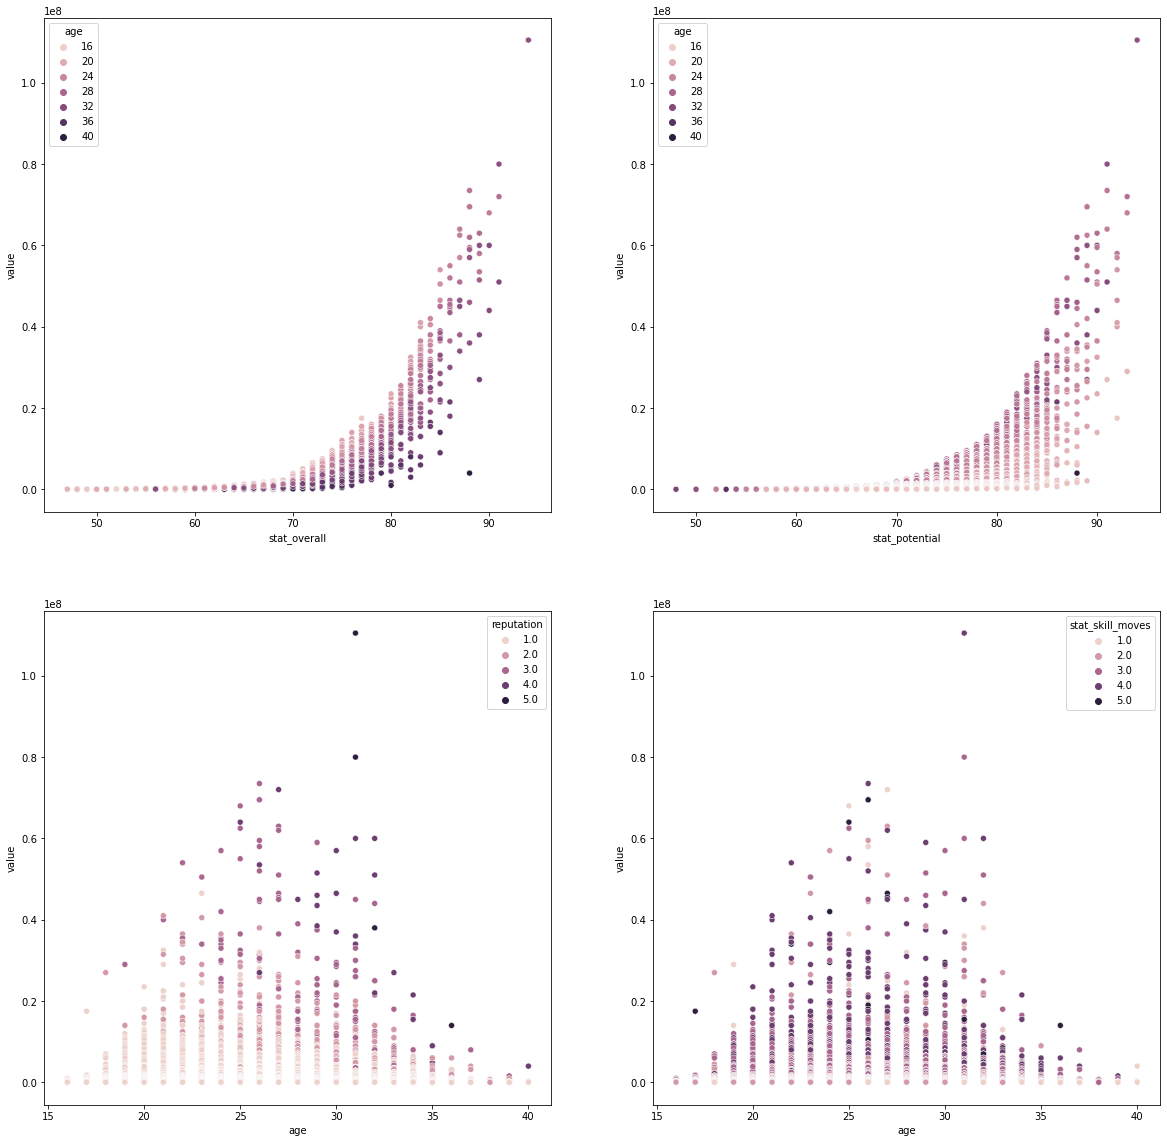

In [12]:
#다양한 시각화 시도
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,20))

sns.scatterplot(data=train_data, x='stat_overall',y='value', hue='age', ax=ax[0,0])
sns.scatterplot(data=train_data, x='stat_potential',y='value', hue='age', ax=ax[0,1])
sns.scatterplot(data=train_data, x='age',y='value', hue='reputation', ax=ax[1,0])
sns.scatterplot(data=train_data, x='age',y='value', hue='stat_skill_moves', ax=ax[1,1])

<AxesSubplot:xlabel='reputation', ylabel='value'>

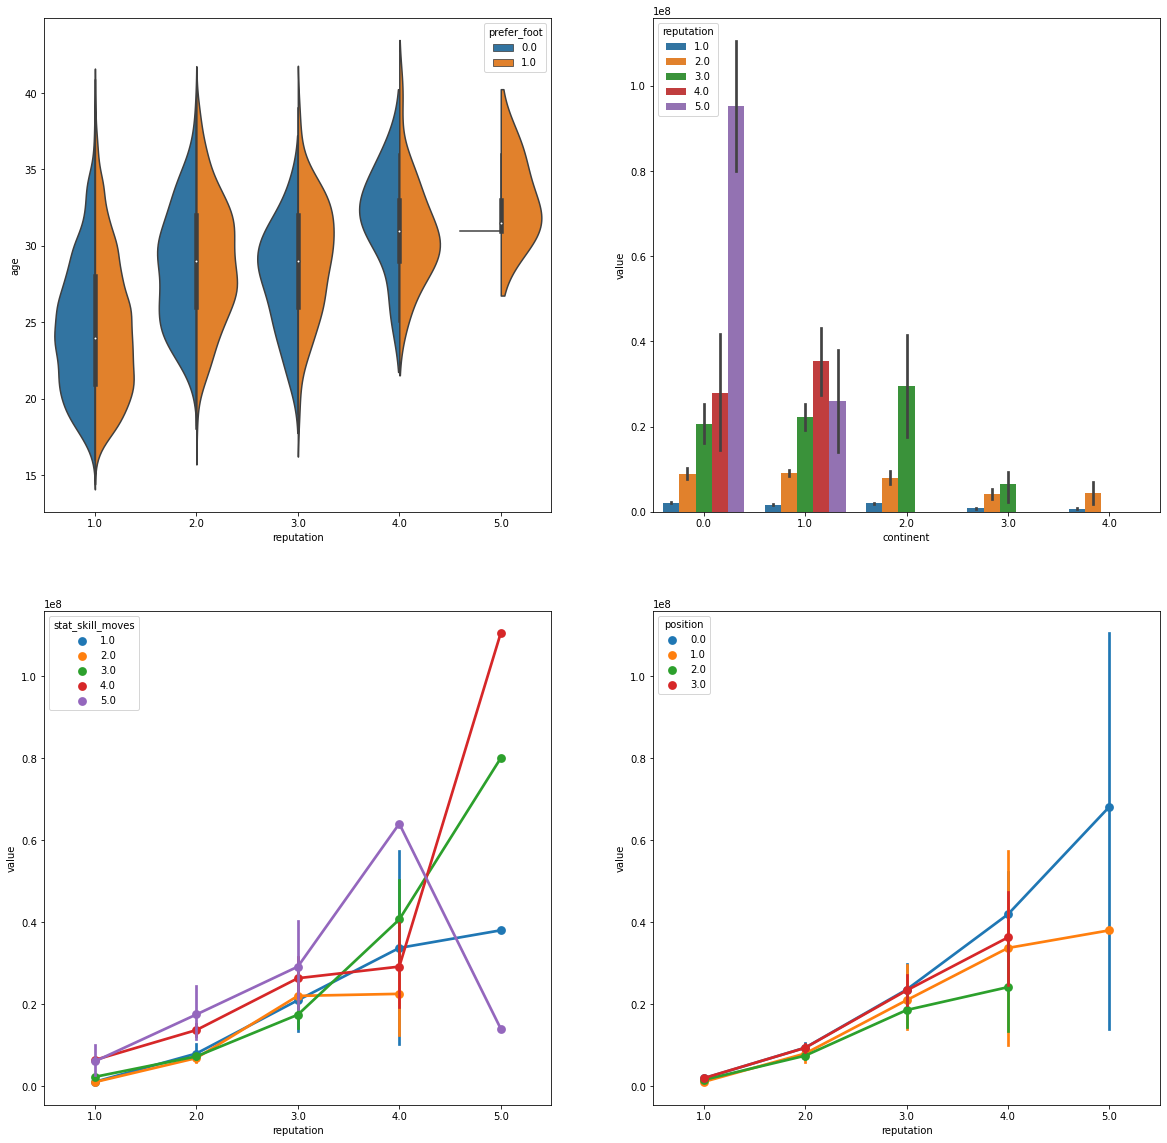

In [13]:
#다양한 시각화 시도
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,20))

sns.violinplot(x='reputation', y='age',data=train_data, hue ='prefer_foot', split=True,ax=ax[0,0])
sns.barplot(x='continent',y='value', hue = 'reputation', data=train_data,ax=ax[0,1])
# 0 = 남미, 1 = 유럽,2 = 아프리카, 3 = 아시아, 4 = 오세아니아
sns.pointplot(data=train_data, x='reputation', y='value', hue='stat_skill_moves',ax=ax[1,0])
sns.pointplot(data=train_data, x='reputation', y='value', hue='position',ax=ax[1,1])
# 0 = 공격수, 1 = 골키퍼, 2 = 수비수, 3 = 미드필더

In [14]:
#중요도가 높은 데이터만 추출
selected_data = train_data[["reputation",'stat_overall','stat_potential', 'stat_skill_moves', 'value']]
print(selected_data)

      reputation  stat_overall  stat_potential  stat_skill_moves        value
0            5.0            94              94               4.0  110500000.0
1            4.0            91              93               1.0   72000000.0
2            5.0            91              91               3.0   80000000.0
3            4.0            91              91               3.0   51000000.0
4            3.0            90              93               1.0   68000000.0
...          ...           ...             ...               ...          ...
8927         1.0            48              63               3.0      60000.0
8928         1.0            47              59               2.0      40000.0
8929         1.0            47              64               2.0      50000.0
8930         1.0            47              65               1.0      50000.0
8931         1.0            47              63               2.0      60000.0

[8932 rows x 5 columns]


In [15]:
#데이터 검증을 위한 데이터 5 분류 why? reputation, stat_skill_moves도 1부터 5까지로 정도를 구분
selected_data['value'] = pd.cut(selected_data['value'], 5,labels=['1', '2', '3','4','5'])

C:\Users\pjh23\AppData\Local\Temp\ipykernel_40068\540149102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['value'] = pd.cut(selected_data['value'], 5,labels=['1', '2', '3','4','5'])


In [16]:
#1부터 5순으로 5가 제일 높음
print(selected_data['value'])

0       5
1       4
2       4
3       3
4       4
       ..
8927    1
8928    1
8929    1
8930    1
8931    1
Name: value, Length: 8932, dtype: category
Categories (5, object): ['1' < '2' < '3' < '4' < '5']


# 모델의 성능 검정 실시

In [31]:
lr = LinearRegression(fit_intercept=True)

In [32]:
#훈련데이터 분류
#X요소에 이적 중요 요소의 특성으로 지정
X = selected_data.drop(['value'], axis=1)
print(X.head())
print('\n')
#y요소에 이적료 가치를 타겟으로 지정
y = selected_data['value']
print(y.head())

   reputation  stat_overall  stat_potential  stat_skill_moves
0         5.0            94              94               4.0
1         4.0            91              93               1.0
2         5.0            91              91               3.0
3         4.0            91              91               3.0
4         3.0            90              93               1.0


0    5
1    4
2    4
3    3
4    4
Name: value, dtype: category
Categories (5, object): ['1' < '2' < '3' < '4' < '5']


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [20]:
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
lr.coef_

array([ 0.19553045, -0.00024957,  0.00407782, -0.00467581])

In [22]:
#위에 있는 요소들을 기울기로 표현 밑에있는 순서대로 위의 기울기 점수
X_train.columns

Index(['reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves'], dtype='object')

In [23]:
lr.intercept_

0.5340233725706012

In [24]:
#절편 값으로 예측치 설정
y_pred = lr.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

MAE = mean_absolute_error(y_test, y_pred) 
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MSLE = mean_squared_log_error(y_test, y_pred)
RMSLE = np.sqrt(mean_squared_log_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred)

print(f'MAE:\t {MAE:.4f}', "평균 절대 오차, 실제 타겟값과 예측 타겟값 차의 절대값 평균")
print(f'MSE:\t {MSE:.4f}', "평균 제곱 오차, 실제 타겟 값과 예측 타겟값 차의 제곱의 평균")
print(f'RMSE:\t {RMSE:.4f}', "평균 제곱근 오차, MSE에 제곱근을 취한값")
print(f'MSLE:\t {MSLE:.4f}', "MSE에서 타겟값에 로그를 취한 값")
print(f'RMSLE:\t {RMSLE:.4f}', "MSLE에서 제곱근을 취한 값")
print(f'R2:\t {R2:.4f}', "결정계수, 예측 타겟값의 분산 / 실제 타겟값의 분산 *다른 지표와 다르게 1에 가까울수록 모델 성능이 좋습니다.")

MAE:	 0.0499 평균 절대 오차, 실제 타겟값과 예측 타겟값 차의 절대값 평균
MSE:	 0.0224 평균 제곱 오차, 실제 타겟 값과 예측 타겟값 차의 제곱의 평균
RMSE:	 0.1497 평균 제곱근 오차, MSE에 제곱근을 취한값
MSLE:	 0.0032 MSE에서 타겟값에 로그를 취한 값
RMSLE:	 0.0562 MSLE에서 제곱근을 취한 값
R2:	 0.2095 결정계수, 예측 타겟값의 분산 / 실제 타겟값의 분산 *다른 지표와 다르게 1에 가까울수록 모델 성능이 좋습니다.


데이터적으로 1.명성, 2.현재 능력, 3.잠재력, 4.개인기 순으로 중요하다고 알수 있습니다.

위의 결과로 제일 높은 관계를 가진 명성은 아마도 높은 연봉 차이 떄문에 크게 중요하다고 보여지는것 같습니다. 
하지만 그래프 상으로 가장 중요하게 보여지는 것들은 선수의 나이와 현재 능력 그리고 잠재력으로 뽑을수 있습니다.
데이터를 통하여 우리가 저평가 되고 있는 선수를 뽑을 떄 볼수있는 중요한 요소는 나이와 개인기라고도 생각이 되어진다. 왜냐하면 지표상으로 나이와 개인기에서 매우 저평가 되어있는 선수들이 있습니다. 높은 명성의 선수는 개인기 능력이 매우 좋지만 그중 몇몇 선수는 명성에 비해 개인기 능력이 매우 떨어지는것을 볼수 있습니다. 결과적으로 좋은 팀을 꾸리기 위해서는 나이와 개인기 지표를 통해서 저평가된 인원들을 찾아서 좋은 팀을 꾸릴수 있다고 생각합니다.